In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
df = pd.read_csv("cancer-death-rates-by-age.csv")
df

,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716
...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.642187,182.596478,79.281072,1340.306429,2.495452,465.147739,34.026731
6836,Zimbabwe,ZWE,2016,2.753739,182.424420,80.128518,1336.598159,2.683036,464.267622,34.769286
6837,Zimbabwe,ZWE,2017,2.752663,181.835774,80.769870,1333.762807,2.768516,461.892531,35.273065
6838,Zimbabwe,ZWE,2018,2.718565,181.356873,81.484036,1330.364400,2.797381,458.788271,35.747494


In [11]:
# Select the relevant age group columns
age_columns = [
    'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)',
    'Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)',
    'Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)',
    'Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate)',
    'Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)'
]

In [12]:
# Melt the dataframe into long format
df_melted = df.melt(
    id_vars=['Entity', 'Year'],
    value_vars=age_columns,
    var_name='Age Group',
    value_name='Cancer Death Rate'
)

# Clean the age group labels
df_melted['Age Group'] = df_melted['Age Group'].str.extract(r'Age: (.*) \(Rate\)')

In [13]:
df_melted



,Entity,Year,Age Group,Cancer Death Rate
0,Afghanistan,1990,Under 5,21.333432
1,Afghanistan,1991,Under 5,18.701225
2,Afghanistan,1992,Under 5,16.801217
3,Afghanistan,1993,Under 5,16.527773
4,Afghanistan,1994,Under 5,16.527686
...,...,...,...,...
34195,Zimbabwe,2015,70+ years,1340.306429
34196,Zimbabwe,2016,70+ years,1336.598159
34197,Zimbabwe,2017,70+ years,1333.762807
34198,Zimbabwe,2018,70+ years,1330.364400


In [14]:
# Drop missing values
df_clean = df_melted.dropna()

# Features and target
X = df_clean[['Age Group', 'Year', 'Entity']]
y = df_clean['Cancer Death Rate']

In [15]:
# Encode categorical features
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_encoded = pd.DataFrame(encoder.fit_transform(X), columns=X.columns)

# Categorical and numeric features
categorical_features = ['Age Group', 'Entity']
numeric_features = ['Year']


In [16]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [18]:
# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (with Entity included): {rmse:.2f}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape*100:.2f}%")

RMSE (with Entity included): 10.02
Mean Squared Error (MSE): 100.37
Mean Absolute Percentage Error (MAPE): 2.39%


<ipython-input-19-09d9d7d20636>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-19-09d9d7d20636>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


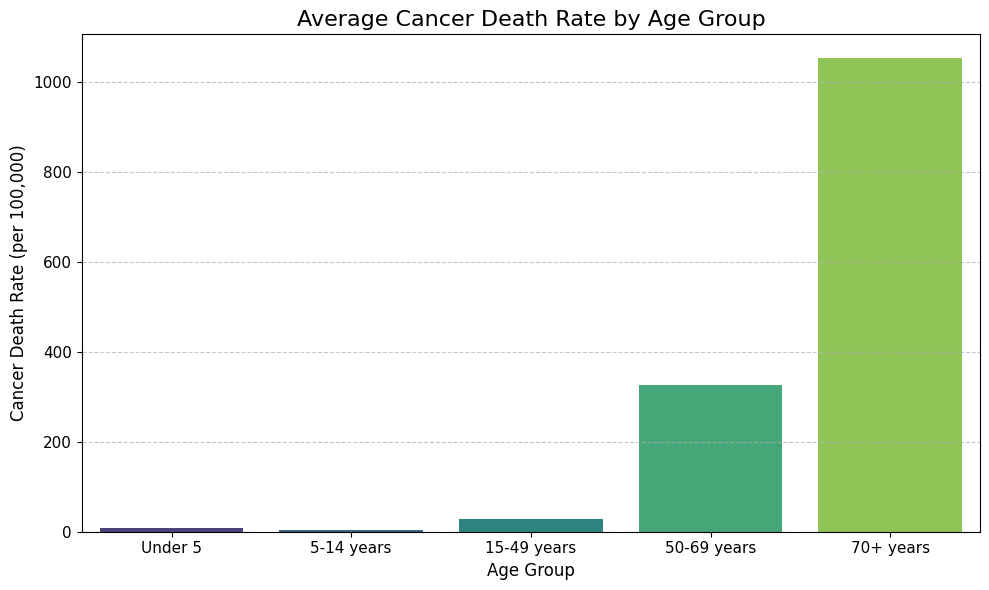

In [19]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_clean,
    x='Age Group',
    y='Cancer Death Rate',
    estimator='mean',
    ci=None,
    palette='viridis'
)

plt.title('Average Cancer Death Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Cancer Death Rate (per 100,000)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

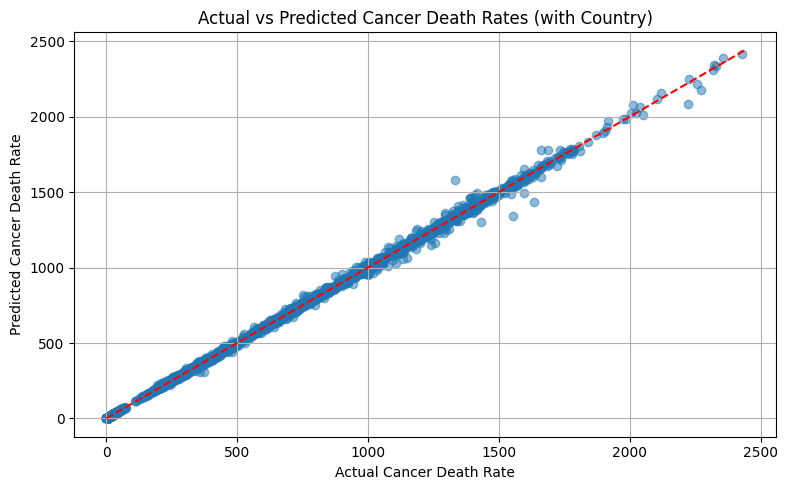

In [20]:
# Plot predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Cancer Death Rate")
plt.ylabel("Predicted Cancer Death Rate")
plt.title("Actual vs Predicted Cancer Death Rates (with Country)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()